<a href="https://colab.research.google.com/github/Hamood564/MachinePartDefect/blob/main/Defects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2 as cv #openCV
import numpy as np
import pandas as pd
from PIL import Image #pillow
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import os
os.chdir("/content/drive/MyDrive/")
!ls

'AMP Assignment Groups.gsheet'
'Application form.docx (Recovered).docx'
 Assembly.rar
 books
 Classroom
'Colab Notebooks'
'Document from Hamood.pdf'
'Douluo Dalu'
'Industrial Challenges in Adopting Intelligent Production Systems.gform'
'[jay heizer, barry render]operations management 10th global edition.pdf'
 MobileNet_model_keras.h5
 MobileNet_model_wieghts.h5
'Personal Details.gform'
 Registration.gsheet
'Rubrics for Assessment of Mold Design.docx'
'Rubrics for Assessment of Project (1).pdf'
'Rubrics for Assessment of Project.pdf'
'sap mm'
'Science project.gslides'
'Untitled document.gdoc'
'Untitled form.gform'
'Untitled presentation.gslides'
'Untitled Site.gsite'
 Wasif_PhD_S2013.pdf
 YE358311_Fender_apron


In [9]:
img = cv.imread("/content/drive/MyDrive/YE358311_Fender_apron/YE358311_Crack_and_Wrinkle_defect/IMG20180905143945.jpg")


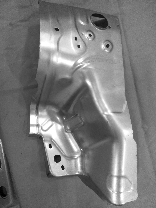

In [10]:
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.resize(img,(0,0),fx=.05,fy=.05)
Image.fromarray(img)

In [11]:
def pre_processing(image_path):
    #Reading the image with opencv
    image=cv.imread(image_path)
    image = np.array(image, dtype=np.uint8)
    #changing to grayscale
    
    #Rotating if image is vertical
    if image.shape[1]<image.shape[0]:
        #compairing width and height
        image = np.rot90(image)
    
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    #Applying Gaussian blur to the image, to reduce the noise
    blur=cv.GaussianBlur(image,(13,13),0)
    
    #resizing images to 10% of their original size, as they all are HD images
    blur=cv.resize(blur,(0,0),fx=.1,fy=.1)
    gray=cv.resize(gray,(0,0),fx=.1,fy=.1)

    return gray, blur, image
processed = pre_processing("/content/drive/MyDrive/YE358311_Fender_apron/YE358311_Crack_and_Wrinkle_defect/IMG20180905143945.jpg")
len(processed)

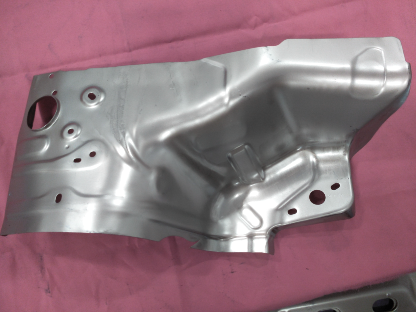

In [14]:
Image.fromarray(processed[1])

In [15]:
from skimage.exposure import rescale_intensity
#Convolution function, takes in the image and the kernel for processing, applies the required filters required
def convolve(image, kernel):
    (iH,iW)=image.shape[:2]
    (kH,kW)=kernel.shape[:2]
    pad=(kW-1)/2
    pad=int(pad)
    image=cv.copyMakeBorder(image,pad,pad,pad,pad,cv.BORDER_REPLICATE)
    output=np.zeros((iH,iW),dtype="float32")

    for y in np.arange(pad,iH+pad):
        for x in np.arange(pad,iW+pad):
            roi=image[y-pad:y+pad+1,x-pad:x+pad+1]
            k=(roi*kernel).sum()
            output[y-pad,x-pad]=k
    output=rescale_intensity(output,in_range=(0,255))
    output=(output*255).astype("uint8")
    return output

def run_kerneler(image):
    #Sharpening Kernels
    sharpen=np.array((
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]),dtype="int")

    #Laplacian Kerner
    laplacian=np.array((
    [0,1,0],
    [1,-4,1],
    [0,1,0]),dtype="int")

    #Sobel Kernel in the X direction, detects the edges only in the X direction
    sobelX=np.array((
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]),dtype="int")

    #Sobel Kernel in the Y direction, detects the edges only in the Y direction
    sobelY=np.array((
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]),dtype="int")

    #Kernel bank, sends the image and the kernel to convolve function, to convolute it
    kernelBank=(
    #("Small Blurring",smallBlur),
    #("Large Blurring",largeBlur),
    ("Sharpen",sharpen),
    ("Sobel X",sobelX),
    ("Sobel Y",sobelY),
    ("Laplacian",laplacian))
    #Adding first image here
    gray, blur, image = pre_processing(image)
    #Converting image to gray-scale here
    #Displaying images here
    #Cycles through all the kernels available in the bank, compares with the image
    for(kernelName,kernel) in kernelBank:
        print("[INFO]Applying {} kernel".format(kernelName))
        convolve_gray_Output=convolve(gray,kernel)
        convolve_blur_Output=convolve(blur,kernel)
        convolve_gray_Output=cv.copyMakeBorder(convolve_gray_Output,0,50,0,0,cv.BORDER_CONSTANT,value=[255,0,0])
        convolve_gray_Output=cv.putText(convolve_gray_Output,"Filter: "+kernelName+" "+"Mode: Gray",(10,(convolve_gray_Output.shape[0]-20)),cv.FONT_HERSHEY_SIMPLEX,0.35, (100,100,100),1,cv.LINE_AA)
        convolve_gray_Output=cv.rectangle(convolve_gray_Output,(0,(convolve_gray_Output.shape[0]-50)),(convolve_gray_Output.shape[1],convolve_gray_Output.shape[0]),(0,0,0),3)
        convolve_blur_Output=cv.copyMakeBorder(convolve_blur_Output,0,50,0,0,cv.BORDER_CONSTANT,value=[255,0,0])
        convolve_blur_Output=cv.putText(convolve_blur_Output,"Filter: "+kernelName+" "+"Mode: Blur",(10,(convolve_blur_Output.shape[0]-20)),cv.FONT_HERSHEY_SIMPLEX,0.35, (100,100,100),1,cv.LINE_AA)
        convolve_blur_Output=cv.rectangle(convolve_blur_Output,(0,(convolve_blur_Output.shape[0]-50)),(convolve_blur_Output.shape[1],convolve_blur_Output.shape[0]),(0,0,0),3)
        cv.imwrite('Results/'+kernelName+"_Gray"+".jpg", convolve_gray_Output)
        cv.imwrite('Results/'+kernelName+"_Blur"+".jpg", convolve_blur_Output)

In [16]:
run_kerneler("/content/drive/MyDrive/YE358311_Fender_apron/YE358311_Crack_and_Wrinkle_defect/IMG20180905143945.jpg")


[INFO]Applying Sharpen kernel
[INFO]Applying Sobel X kernel
[INFO]Applying Sobel Y kernel
[INFO]Applying Laplacian kernel


In [17]:
import os
import random
train_dir_1 = "/content/drive/MyDrive/YE358311_Fender_apron/train/YE358311_defects/YE358311_Crack_and_Wrinkle_defect"
train_dir_2="/content/drive/MyDrive/YE358311_Fender_apron/train/YE358311_Healthy"
test_dir = "/content/drive/MyDrive/YE358311_Fender_apron/test/test"
train_defective = ["/content/drive/MyDrive/YE358311_Fender_apron/train/YE358311_defects/YE358311_Crack_and_Wrinkle_defect/{}".format(i) for i in os.listdir(train_dir_1)]
train_healthy = ["/content/drive/MyDrive/YE358311_Fender_apron/train/YE358311_Healthy/{}".format(i) for i in os.listdir(train_dir_2)]
print("Healthy Images in Train Data: {}".format(len(train_healthy)))
print("Defective Images in Train Data: {}".format(len(train_defective)))

Healthy Images in Train Data: 124
Defective Images in Train Data: 101


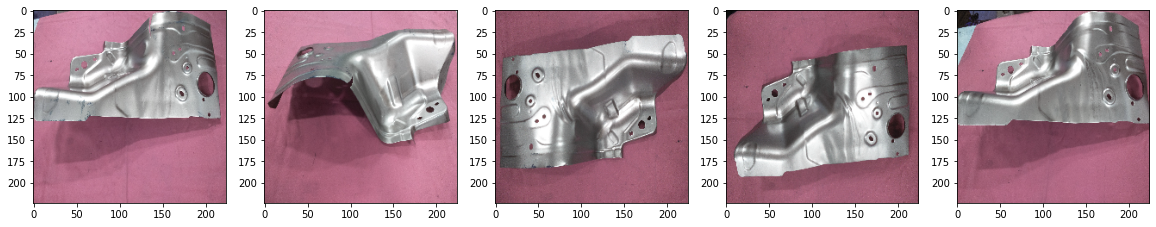

In [18]:
"""X is an array of images
   y is an array of labels 1 & 0
   1 means defect is there
   0 means defect is not there
"""
#adding both type of images to x
y=[]
X=[]
nrows = 224
ncolumns = 224
channels = 3
for image in train_defective:
    X.append(cv.resize(pre_processing(image)[2], (nrows,ncolumns), interpolation=cv.INTER_CUBIC))
    y.append(1)
for image in train_healthy:
    X.append(cv.resize(pre_processing(image)[2], (nrows,ncolumns), interpolation=cv.INTER_CUBIC))
    y.append(0)
plt.figure(figsize=(20,10))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(X[i])

In [19]:
from collections import Counter
print("Unique values: {}".format(Counter(y).keys()))
Counter(y).values()


Unique values: dict_keys([1, 0])


dict_values([101, 124])

In [20]:
#Randomizing both lists in same order
train = list(zip(X, y))
random.shuffle(train)
X, y = zip(*train)
#list to array
X = np.array(X)
y = np.array(y)
print("Shape of train images is {}".format(X.shape))
print("Shape of train labels is {}".format(y.shape))

Shape of train images is (225, 224, 224, 3)
Shape of train labels is (225,)


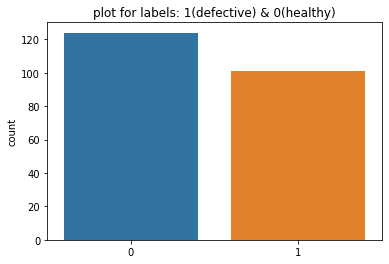

In [21]:
sns.countplot(y)
plt.title("plot for labels: 1(defective) & 0(healthy)");

In [22]:

targets = y
y = np.eye(2)[targets]
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping

# parameters for architecture
input_shape = (224, 224, 3)
num_classes = 2
filt_size = 32

# parameters for training
batch_size = 16
num_epochs = 20

# build the model
base_model = Sequential()

base_model.add(Conv2D(filt_size, (3, 3), activation='relu', padding='same', input_shape=input_shape)) 
base_model.add(MaxPooling2D(pool_size=(2, 2)))

base_model.add(Conv2D(2*filt_size, (3, 3), activation='relu', padding='same'))
base_model.add(MaxPooling2D(pool_size=(2, 2)))
    
base_model.add(Conv2D(4*filt_size, (3, 3), activation='relu', padding='same'))
base_model.add(MaxPooling2D(pool_size=(2, 2)))
    
base_model.add(Flatten())

base_model.add(Dense(512, activation='relu'))
base_model.add(Dense(512, activation='relu'))

base_model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# compile the model
base_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

In [24]:
# train the model                    
history = base_model.fit(X, y,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[es])

Epoch 1/20
13/13 [==============================] - 25s 2s/step - loss: 497.1842 - accuracy: 0.4808 - val_loss: 2.7535 - val_accuracy: 0.4783
Epoch 2/20
13/13 [==============================] - 22s 2s/step - loss: 1.3769 - accuracy: 0.4748 - val_loss: 0.6970 - val_accuracy: 0.5217
Epoch 3/20
13/13 [==============================] - 22s 2s/step - loss: 0.6868 - accuracy: 0.5834 - val_loss: 0.7141 - val_accuracy: 0.5217
Epoch 00003: early stopping


In [25]:
test_defective = ["/content/drive/MyDrive/YE358311_Fender_apron/test/test/{}.jpg".format(i) for i in range(1,11)]
test_healthy = ["/content/drive/MyDrive/YE358311_Fender_apron/test/test/{}.jpg".format(i) for i in range(11,26)]
print("Healthy Images in Test Data: {}".format(len(test_healthy)))
print("Defective Images in Test Data: {}".format(len(test_defective)))
X_test=[]
y_test=[]
for image in test_defective:
    X_test.append(cv.resize(pre_processing(image)[2], (nrows,ncolumns), interpolation=cv.INTER_CUBIC))
    y_test.append(1)
for image in test_healthy:
    X_test.append(cv.resize(pre_processing(image)[2], (nrows,ncolumns), interpolation=cv.INTER_CUBIC))
    y_test.append(0)
#Randomizing both lists in same order
test = list(zip(X_test, y_test))
random.shuffle(test)
X_test, y_test = zip(*test)
#list to array
X_test = np.array(X_test)
y_test = np.array(y_test)
print("Shape of test images is {}".format(X_test.shape))
print("Shape of test labels is {}".format(y_test.shape))
targets = y_test
y_test = np.eye(2)[targets]
print("length of Test data: {}".format(len(y_test)))

Healthy Images in Test Data: 15
Defective Images in Test Data: 10
Shape of test images is (25, 224, 224, 3)
Shape of test labels is (25,)
length of Test data: 25


In [26]:
y_test_pred = base_model.predict(X_test)
y_test_pred

array([[0.5940844 , 0.40591562],
       [0.5827062 , 0.41729376],
       [0.59744596, 0.40255404],
       [0.59566474, 0.4043353 ],
       [0.5842399 , 0.41576013],
       [0.60094124, 0.39905876],
       [0.57803166, 0.42196837],
       [0.5950104 , 0.40498963],
       [0.5867372 , 0.41326275],
       [0.59917265, 0.40082738],
       [0.57968134, 0.42031863],
       [0.5748244 , 0.42517567],
       [0.6014025 , 0.39859748],
       [0.51893044, 0.4810696 ],
       [0.5688778 , 0.43112218],
       [0.597538  , 0.402462  ],
       [0.59601635, 0.40398365],
       [0.5834406 , 0.4165594 ],
       [0.5810829 , 0.41891712],
       [0.6324277 , 0.36757234],
       [0.5948658 , 0.40513417],
       [0.6027662 , 0.39723384],
       [0.5932533 , 0.40674675],
       [0.59857893, 0.40142104],
       [0.5957314 , 0.40426862]], dtype=float32)

In [27]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
# parameters for architecture
input_shape = (224, 224, 3)
num_classes = 2
conv_size = 32

# parameters for training
batch_size = 16
num_epochs = 20

# load InceptionV3 from Keras
InceptionV3_model = InceptionV3(include_top=False, input_shape=input_shape)

# add custom Layers
x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
Custom_Output = Dense(num_classes, activation='softmax')(x)

# define the input and output of the model
InceptionV3_model = Model(inputs = InceptionV3_model.input, outputs = Custom_Output)
        
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

# compile the model
InceptionV3_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

InceptionV3_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d_3[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [28]:
# train the model 
history = InceptionV3_model.fit(X, y,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[es])

Epoch 1/20
13/13 [==============================] - 107s 8s/step - loss: 1.3747 - accuracy: 0.5297 - val_loss: 1062.8159 - val_accuracy: 0.5217
Epoch 2/20
13/13 [==============================] - 86s 7s/step - loss: 0.6076 - accuracy: 0.5362 - val_loss: 6320.9951 - val_accuracy: 0.4783
Epoch 3/20
13/13 [==============================] - 85s 7s/step - loss: 0.4497 - accuracy: 0.7605 - val_loss: 2200.6946 - val_accuracy: 0.5217
Epoch 00003: early stopping


In [29]:
y_t_pred =InceptionV3_model.predict(X_test)
y_t_pred

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [30]:
def make_classes(y_pred):
    for i in y_pred:
        if i[0] > 0.5:
            i[0]=1
            i[1]=0
        elif i[0] <= 0.5:
            i[1]=1
            i[0]=0
    return y_pred
make_classes(y_t_pred)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [31]:
def compare(y_test,y_t_pred):
    Y_Predictions = pd.DataFrame([i[0] for i in y_t_pred],copy=False)
    y_Test = pd.DataFrame([i[0] for i in y_test],copy=False)
    df_dnn = pd.concat([Y_Predictions,y_Test],axis=1)
    df_dnn.columns=['Y_Predictions','y_Test']
    return df_dnn
df_dnn = compare(y_test,y_t_pred)

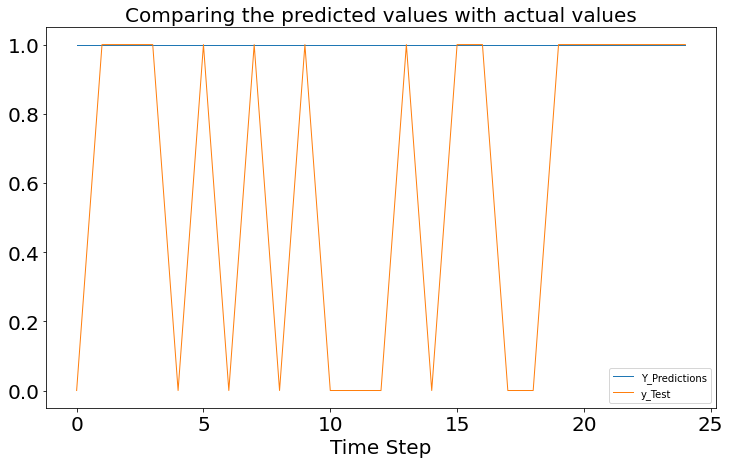

In [32]:
df_dnn.plot(figsize=(12,7), linewidth=1, fontsize=20)
plt.xlabel('Time Step', fontsize=20);
plt.title("Comparing the predicted values with actual values", fontsize=20);

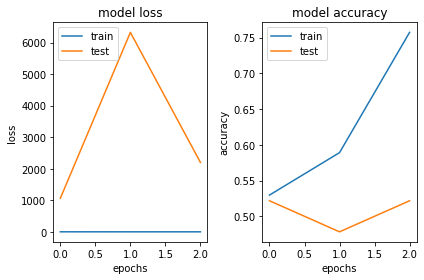

In [33]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend();
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout();

In [34]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,accuracy_score
testy = y_test[:, 0]
yt_classes = y_t_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yt_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yt_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yt_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yt_classes)
print('F1 score: %f' % f1)

Accuracy: 0.600000
Precision: 0.600000
Recall: 1.000000
F1 score: 0.750000


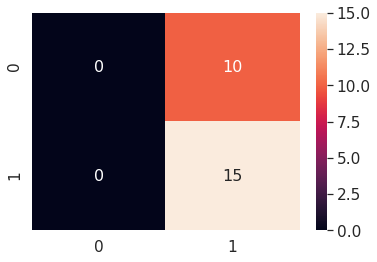

In [35]:

# confusion matrix
matrix = confusion_matrix(testy, yt_classes)      
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16});# font size

In [36]:
from keras.applications.mobilenet import MobileNet
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

# parameters for architecture
input_shape = (224, 224, 3)
num_classes = 2
conv_size = 32

# parameters for training
batch_size = 16
num_epochs = 20

# load MobileNet from Keras
MobileNet_model = MobileNet(include_top=False, input_shape=input_shape)

# add custom Layers
x = MobileNet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
Custom_Output = Dense(num_classes, activation='softmax')(x)

# define the input and output of the model
MobileNet_model = Model(inputs = MobileNet_model.input, outputs = Custom_Output)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)   
# compile the model
MobileNet_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

MobileNet_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [37]:

# train the model 
history = MobileNet_model.fit(X, y,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[es])

Epoch 1/20
13/13 [==============================] - 40s 3s/step - loss: 1.5114 - accuracy: 0.6422 - val_loss: 1.7991 - val_accuracy: 0.4783
Epoch 2/20
13/13 [==============================] - 37s 3s/step - loss: 0.2154 - accuracy: 0.8986 - val_loss: 0.7433 - val_accuracy: 0.5652
Epoch 3/20
13/13 [==============================] - 37s 3s/step - loss: 0.1290 - accuracy: 0.9359 - val_loss: 0.3170 - val_accuracy: 0.8696
Epoch 4/20
13/13 [==============================] - 37s 3s/step - loss: 0.1509 - accuracy: 0.9626 - val_loss: 0.3148 - val_accuracy: 0.9565
Epoch 5/20
13/13 [==============================] - 37s 3s/step - loss: 0.0475 - accuracy: 0.9868 - val_loss: 0.2715 - val_accuracy: 0.9565
Epoch 6/20
13/13 [==============================] - 37s 3s/step - loss: 0.0320 - accuracy: 0.9819 - val_loss: 0.4039 - val_accuracy: 0.9565
Epoch 7/20
13/13 [==============================] - 37s 3s/step - loss: 0.0027 - accuracy: 0.9985 - val_loss: 0.3324 - val_accuracy: 0.9565
Epoch 00007: early s

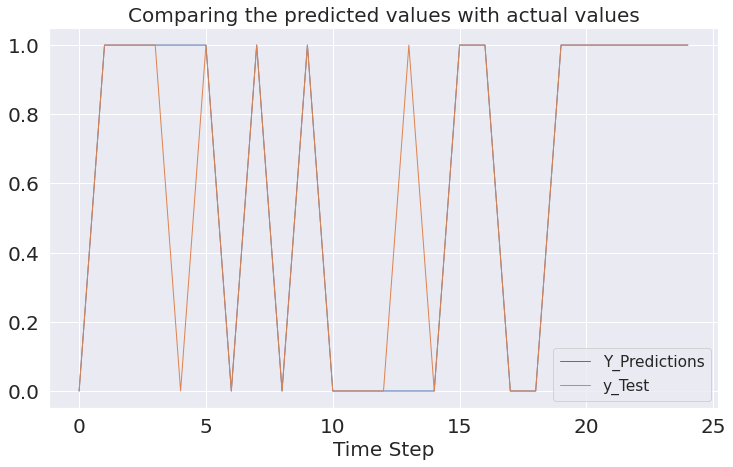

In [38]:

y_t_pred =MobileNet_model.predict(X_test)
y_t_pred = make_classes(y_t_pred)
df_dnn = compare(y_test,y_t_pred)
df_dnn.plot(figsize=(12,7), linewidth=1, fontsize=20)
plt.xlabel('Time Step', fontsize=20);
plt.title("Comparing the predicted values with actual values", fontsize=20);

In [39]:
testy = y_test[:, 0]
yt_classes = y_t_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yt_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yt_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yt_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yt_classes)
print('F1 score: %f' % f1)

Accuracy: 0.920000
Precision: 0.933333
Recall: 0.933333
F1 score: 0.933333


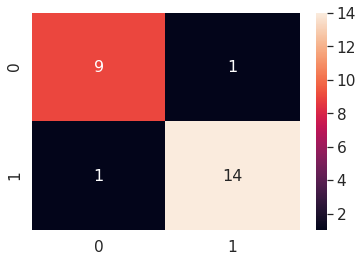

In [40]:

# confusion matrix
matrix = confusion_matrix(testy, yt_classes)      
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16});# font size

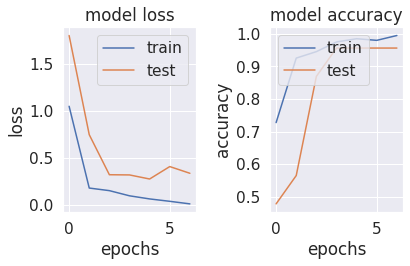

In [41]:

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend();
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout();

In [42]:

#saving the model 
MobileNet_model.save_weights('MobileNet_model_wieghts.h5')
MobileNet_model.save('MobileNet_model_keras.h5')